In [322]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [323]:
file = '../Resources/Clean_Committee_2013.csv'
IC_2013 = pd.read_csv(file,index_col='CandidateName')
uncleaned = pd.read_csv(file,index_col=False)
IC_2013.head()

,Unnamed: 0,Election,CandidateID,Date,Name,ContributerType,BoroughName,City,State,ZipCode,ContributionState,Amount,MatchAmt,PrevAmt,PayMethod,TotalAmount
CandidateName,,,,,,,,,,,,,,,,
"Quinn, Christine C",0,2013,204,2011-07-11,1199 SEIU PAC - NYS PA Fund,Political Action Committee,Manhattan,New York,NY,10036.0,NaN,1000.00,0.0,0.0,Check,1000.00
"Quinn, Christine C",1,2013,204,2013-01-10,1199 SEIU PAC - NYS PA Fund,Political Action Committee,Manhattan,New York,NY,10036.0,NaN,3950.00,0.0,1000.0,Check,4950.00
"de Blasio, Bill",2,2013,326,2010-04-29,1199/SEIU NYS Pol. Action Fund,Political Action Committee,Manhattan,New York,NY,10036.0,NaN,4950.00,0.0,0.0,Check,4950.00
"de Blasio, Bill",3,2013,326,2013-09-08,1199/SEIU NYS Pol. Action Fund,Political Action Committee,Manhattan,New York,NY,10036.0,NaN,19084.25,0.0,0.0,Unknown,19084.25
"de Blasio, Bill",4,2013,326,2013-09-08,1199/SEIU NYS Pol. Action Fund,Political Action Committee,Manhattan,New York,NY,10036.0,NaN,168.31,0.0,0.0,Unknown,168.31


In [324]:
IC_2013['ZipCode'] = IC_2013['ZipCode'].apply(str)

In [325]:
IC_2013['ContributerType'].unique()

array(['Political Action Committee', 'Other', 'Labor Union',
       'Corporation', 'Limited Liability Company', 'Party Committee',
       'Individual', 'Candidate Committee'], dtype=object)

In [326]:
IC_2013_df = IC_2013.drop(columns=['ContributionState','PayMethod','Name','CandidateID','Unnamed: 0','Election','BoroughName','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,Amount,MatchAmt,TotalAmount
CandidateName,,,
"de Blasio, Bill",484230.90,0.0,654345.90
"Quinn, Christine C",299681.86,0.0,465581.86
"Thompson, Jr., William C",208002.13,0.0,278359.13
"Lhota, Joseph J",41414.00,0.0,41414.00
"Hidary, Jack D",1500.00,0.0,2500.00
"Salgado, Erick J",675.00,0.0,675.00


<AxesSubplot:xlabel='CandidateName'>

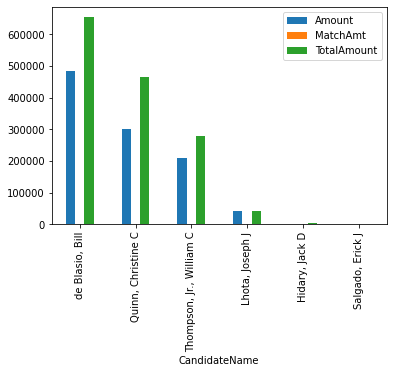

In [327]:
total_groupby.plot.bar()

In [328]:
outcome = []
for i in uncleaned['CandidateName']:
    if i == 'de Blasio, Bill':
        outcome.append('W')
    else:
        outcome.append('L')

IC_2013_df['Outcome'] = outcome
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",2011-07-11,Political Action Committee,New York,NY,10036.0,1000.00,0.0,1000.00,L
"Quinn, Christine C",2013-01-10,Political Action Committee,New York,NY,10036.0,3950.00,0.0,4950.00,L
"de Blasio, Bill",2010-04-29,Political Action Committee,New York,NY,10036.0,4950.00,0.0,4950.00,W
"de Blasio, Bill",2013-09-08,Political Action Committee,New York,NY,10036.0,19084.25,0.0,19084.25,W
"de Blasio, Bill",2013-09-08,Political Action Committee,New York,NY,10036.0,168.31,0.0,168.31,W


In [329]:
IC_2013_df['Date'] = pd.to_datetime(IC_2013_df['Date'])
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",2011-07-11,Political Action Committee,New York,NY,10036.0,1000.00,0.0,1000.00,L
"Quinn, Christine C",2013-01-10,Political Action Committee,New York,NY,10036.0,3950.00,0.0,4950.00,L
"de Blasio, Bill",2010-04-29,Political Action Committee,New York,NY,10036.0,4950.00,0.0,4950.00,W
"de Blasio, Bill",2013-09-08,Political Action Committee,New York,NY,10036.0,19084.25,0.0,19084.25,W
"de Blasio, Bill",2013-09-08,Political Action Committee,New York,NY,10036.0,168.31,0.0,168.31,W


In [330]:
IC_2013_df.isnull().count()

Date               732
ContributerType    732
City               732
State              732
ZipCode            732
Amount             732
MatchAmt           732
TotalAmount        732
Outcome            732
dtype: int64

In [331]:
# IC_2013_df = IC_2013_df.dropna()
# IC_2013_df.isnull().sum()

In [332]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df_enc['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df_enc['City'] = le.fit_transform(IC_2013_df['City'])
IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df_enc['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df_enc['PrevAmt'] = le.fit_transform(IC_2013_df['PrevAmt'])
IC_2013_df_enc['TotalAmount'] = le.fit_transform(IC_2013_df['TotalAmount'])
IC_2013_df_enc['Outcome'] = le.fit_transform(IC_2013_df['Outcome'])
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",136,7,54,18,20,51,0,51,0
"Quinn, Christine C",210,7,54,18,20,77,0,99,0
"de Blasio, Bill",58,7,54,18,20,84,0,99,1
"de Blasio, Bill",262,7,54,18,20,86,0,117,1
"de Blasio, Bill",262,7,54,18,20,32,0,32,1


In [333]:
X = IC_2013_df_enc.drop('Outcome',axis = 1)

In [334]:
y = IC_2013_df_enc['Outcome']

In [335]:
# Check the balance of our target values
y.value_counts()

0    416
1    316
Name: Outcome, dtype: int64

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [337]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [338]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7025925024342745

In [339]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[79, 25],
       [28, 51]])

In [340]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.76      0.65      0.75      0.70      0.50       104
          1       0.67      0.65      0.76      0.66      0.70      0.48        79

avg / total       0.71      0.71      0.69      0.71      0.70      0.49       183



In [341]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",136,7,54,18,20,51,0,51,0
"Quinn, Christine C",210,7,54,18,20,77,0,99,0
"de Blasio, Bill",58,7,54,18,20,84,0,99,1
"de Blasio, Bill",262,7,54,18,20,86,0,117,1
"de Blasio, Bill",262,7,54,18,20,32,0,32,1


In [342]:
X_ContributerType = IC_2013_df_enc.drop(['Outcome','Date','City','State','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_ContributerType = IC_2013_df_enc['Outcome']

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ContributerType, y_ContributerType, random_state=1)

In [344]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [345]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.563595423563778

In [346]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[83, 21],
       [53, 26]])

In [347]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.61      0.80      0.33      0.69      0.51      0.27       104
          1       0.55      0.33      0.80      0.41      0.51      0.25        79

avg / total       0.59      0.60      0.53      0.57      0.51      0.26       183



In [348]:
X_City = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_City = IC_2013_df_enc['Outcome']

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_City, y_City, random_state=1)

In [350]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [351]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.4751095423563778

In [352]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[33, 71],
       [29, 50]])

In [353]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.32      0.63      0.40      0.45      0.19       104
          1       0.41      0.63      0.32      0.50      0.45      0.21        79

avg / total       0.48      0.45      0.50      0.44      0.45      0.20       183



In [354]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",136,7,54,18,20,51,0,51,0
"Quinn, Christine C",210,7,54,18,20,77,0,99,0
"de Blasio, Bill",58,7,54,18,20,84,0,99,1
"de Blasio, Bill",262,7,54,18,20,86,0,117,1
"de Blasio, Bill",262,7,54,18,20,32,0,32,1


In [355]:
X_State = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','City','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_State = IC_2013_df_enc['Outcome']

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_State, y_State, random_state=1)

In [357]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [358]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.4883763388510224

In [359]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[95,  9],
       [74,  5]])

In [360]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.56      0.91      0.06      0.70      0.24      0.06       104
          1       0.36      0.06      0.91      0.11      0.24      0.05        79

avg / total       0.47      0.55      0.43      0.44      0.24      0.06       183



In [361]:
IC_2013_df_enc.head(1)

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",136,7,54,18,20,51,0,51,0


In [362]:
X_ZipCode = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','Amount','MatchAmt','TotalAmount'],axis = 1)
y_ZipCode = IC_2013_df_enc['Outcome']

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ZipCode, y_ZipCode, random_state=1)

In [364]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [365]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5444255111976631

In [366]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[54, 50],
       [34, 45]])

In [367]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.61      0.52      0.57      0.56      0.54      0.29       104
          1       0.47      0.57      0.52      0.52      0.54      0.30        79

avg / total       0.55      0.54      0.55      0.54      0.54      0.30       183



In [368]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Quinn, Christine C",136,7,54,18,20,51,0,51,0
"Quinn, Christine C",210,7,54,18,20,77,0,99,0
"de Blasio, Bill",58,7,54,18,20,84,0,99,1
"de Blasio, Bill",262,7,54,18,20,86,0,117,1
"de Blasio, Bill",262,7,54,18,20,32,0,32,1


In [369]:
X_Amount = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','MatchAmt','TotalAmount'],axis = 1)
y_Amount = IC_2013_df_enc['Outcome']

In [370]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Amount, y_Amount, random_state=1)

In [371]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [372]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5011562804284324

In [373]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[45, 59],
       [34, 45]])

In [374]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.57      0.43      0.57      0.49      0.50      0.24       104
          1       0.43      0.57      0.43      0.49      0.50      0.25        79

avg / total       0.51      0.49      0.51      0.49      0.50      0.25       183



In [375]:
X_MatchAmt = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','Amount','TotalAmount'],axis = 1)
y_MatchAmt = IC_2013_df_enc['Outcome']

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_MatchAmt, y_MatchAmt, random_state=1)

In [377]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [378]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.4751095423563778

In [379]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[33, 71],
       [29, 50]])

In [380]:
X_TotalAmount = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','MatchAmt','Amount'],axis = 1)
y_TotalAmount = IC_2013_df_enc['Outcome']

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TotalAmount, y_TotalAmount, random_state=1)

In [382]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [383]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.49251460564751703

In [384]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[59, 45],
       [46, 33]])

In [385]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.56      0.57      0.42      0.56      0.49      0.24       104
          1       0.42      0.42      0.57      0.42      0.49      0.23        79

avg / total       0.50      0.50      0.48      0.50      0.49      0.24       183



In [386]:
X_Total_Zip = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','MatchAmt','Amount'],axis = 1)
y_Total_Zip = IC_2013_df_enc['Outcome']

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Total_Zip, y_Total_Zip, random_state=1)

In [388]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [389]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.4631815968841285

In [390]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[45, 59],
       [40, 39]])

In [391]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.43      0.49      0.48      0.46      0.21       104
          1       0.40      0.49      0.43      0.44      0.46      0.21        79

avg / total       0.47      0.46      0.47      0.46      0.46      0.21       183



In [392]:
X = IC_2013_df_enc.drop('Outcome',axis = 1)

In [393]:
y = IC_2013_df_enc['Outcome']

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [395]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [396]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7025925024342745

In [397]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[79, 25],
       [28, 51]])

In [398]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.76      0.65      0.75      0.70      0.50       104
          1       0.67      0.65      0.76      0.66      0.70      0.48        79

avg / total       0.71      0.71      0.69      0.71      0.70      0.49       183

